In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading train data
df_train = pd.DataFrame()

df_train1 = pd.DataFrame()
df_train1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/1.csv")
df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train1], axis=0)

df_train0 = pd.DataFrame()
df_train0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/0.csv")
df_train0 = df_train0.drop(df_train0.columns[0], axis=1)  
df_train0["target"] = np.zeros(df_train0.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train0], axis=0)

#reading test data
df_test = pd.DataFrame()

df_test1 = pd.DataFrame()
df_test1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/1.csv")
df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
df_test1["target"] = np.ones(df_test1.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test1], axis=0)

df_test0 = pd.DataFrame()
df_test0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/0.csv")
df_test0 = df_test0.drop(df_test0.columns[0], axis=1)  
df_test0["target"] = np.zeros(df_test0.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test0], axis=0)

df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

In [ ]:
X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [ ]:
est = RandomForestClassifier(n_jobs=-1)

tre = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

rf_hpr = {
    'max_depth': [3,5,10,None],
    'n_estimators': tre,
    'criterion' : ['gini','entropy'],
    'bootstrap' : [True,False],
    
}

In [ ]:
def hypertuning_rscv(est,rf_hpr,nbr_iter,X,y):
  rdmsearch = RandomizedSearchCV(est,
                                 param_distributions=rf_hpr,
                                 scoring='accuracy',
                                 n_iter=nbr_iter,
                                 n_jobs=-1,
                                 cv=10)
  rdmsearch.fit(X,y)
  ht_params = rdmsearch.best_params_
  ht_score = rdmsearch.best_score_
  return ht_params,ht_score

In [ ]:
rf_param,rf_score = hypertuning_rscv(est,rf_hpr,40,X_train,Y_train)

In [ ]:
rf_param

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200}

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,
                                    criterion='entropy',
                                    max_depth=10,
                                    n_estimators=200,
                                    bootstrap=False)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=200, n_jobs=-1)

In [ ]:
Y_pred_train = rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2000
           1       0.93      1.00      0.97      2000

    accuracy                           0.96      4000
   macro avg       0.97      0.96      0.96      4000
weighted avg       0.97      0.96      0.96      4000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       499
           1       0.61      0.64      0.63       500

    accuracy                           0.61       999
   macro avg       0.61      0.61      0.61       999
weighted avg       0.61      0.61      0.61       999



Train CM


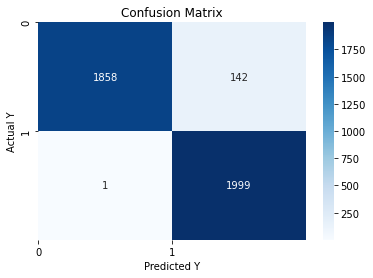





Test CM


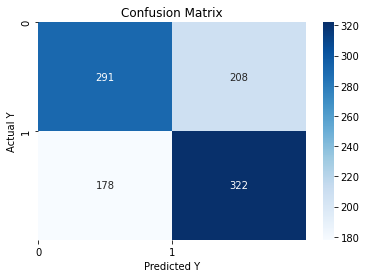

In [ ]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

plt.show()